# Customer Analysis

## Attributes

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month


## Initial Preview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
sns.set_style('darkgrid')
from datetime import date

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [3]:
print('The customer dataset contains ' + str(df.shape[0]) + ' rows, ' + str(df.shape[1]) + ' columns.')

The customer dataset contains 2240 rows, 29 columns.


In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

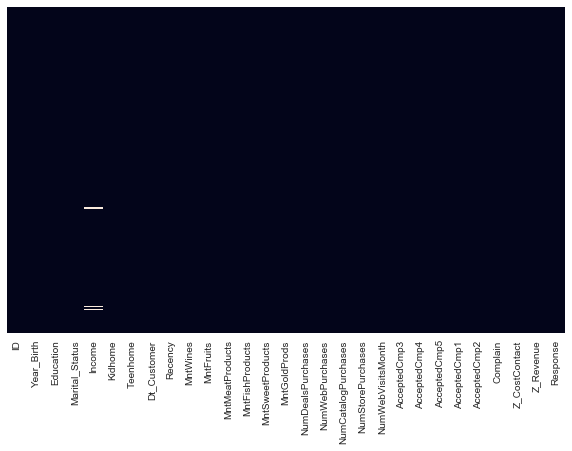

In [9]:
rcParams['figure.figsize'] = 10, 6
sns.set_palette('bright')
sns.heatmap(data=df.isnull(), yticklabels=False, cbar=False)

### Observations and Thoughts

> 1. Base on the data descrition table, I found that 'Year_Birth' column contains anomalous data. The minimum birth year is 1893. I will do a further investigate on the column.

> 2. Because 'Kidhome' and 'Teenhome' are both shows the number of dependent children in customer's household, I will combine them into 1 column.

> 3. Because 'Dt_Customer' shows the date of customer's enrollment with the company, I will change its data type to Datetime.

> 4. The 'Income' column has 24 missing value, I will use the median of all customer's income to fill in the missing value.

> 5. 'Z_CostContact' and 'Z_Revenue' are not meaningful to the analysis, so I will remove this two columns.

> 6. I will add a total number of purchase column, total number of accepted campaign column, total number of product amount.

> 7. I will further investigate 'Education' and 'Marital_Status' and regularize two columns.

## EDA + Data Cleaning

> **Remove 'Z_CostContact' and 'Z_Revenue'**

In [10]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

> **Combine 'Kidhome' and 'Teenhome' into 1 column**

In [12]:
df['Numchildren'] = df.Kidhome + df.Teenhome

> **Create Total Number of Purchases, Total Accepted Campaign, and Total Product Amount**

In [13]:
df['TotalNumPurchases'] = df.NumDealsPurchases + df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases

In [14]:
df['TotalAcceptedCmp'] = df.Response + df.AcceptedCmp5 + df.AcceptedCmp4 + df.AcceptedCmp3 + df.AcceptedCmp2 + df.AcceptedCmp1

In [15]:
df['TotalMnt'] = df.MntWines + df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds

> **'Education' and 'Marital_Status' regularization**

In [16]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

- 1st Cycle corresponds to undergraduate level, or bachelor's level
- 2nd Cycle corresponds to graduate level or master's level
- 3rd Cycle corresponds to doctoral or PhD level

In [17]:
df['Education'] = df.Education.replace(['Basic'], '1st_Cycle')
df['Education'] = df.Education.replace(['Graduation', 'Master', '2n Cycle'], '2nd_Cycle')
df['Education'] = df.Education.replace(['PhD'], '3rd_Cycle')

In [18]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
df['Marital_Status'] = df.Marital_Status.replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')
df['Marital_Status'] = df.Marital_Status.replace(['Together', 'Married'], 'In_Relationships')

> **Create Boxplot for 'Year_Birth' and other columns in order to see if there is any anomaly**

In [20]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Numchildren',
       'TotalNumPurchases', 'TotalAcceptedCmp', 'TotalMnt'],
      dtype='object')

In [21]:
box_col = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
       'NumStorePurchases', 'NumWebVisitsMonth', 'Numchildren', 'TotalNumPurchases', 'TotalAcceptedCmp', 'TotalMnt']
df_boxplot = df[box_col]

Text(0.5, 0.9, 'Boxplots to Check Anomaly')

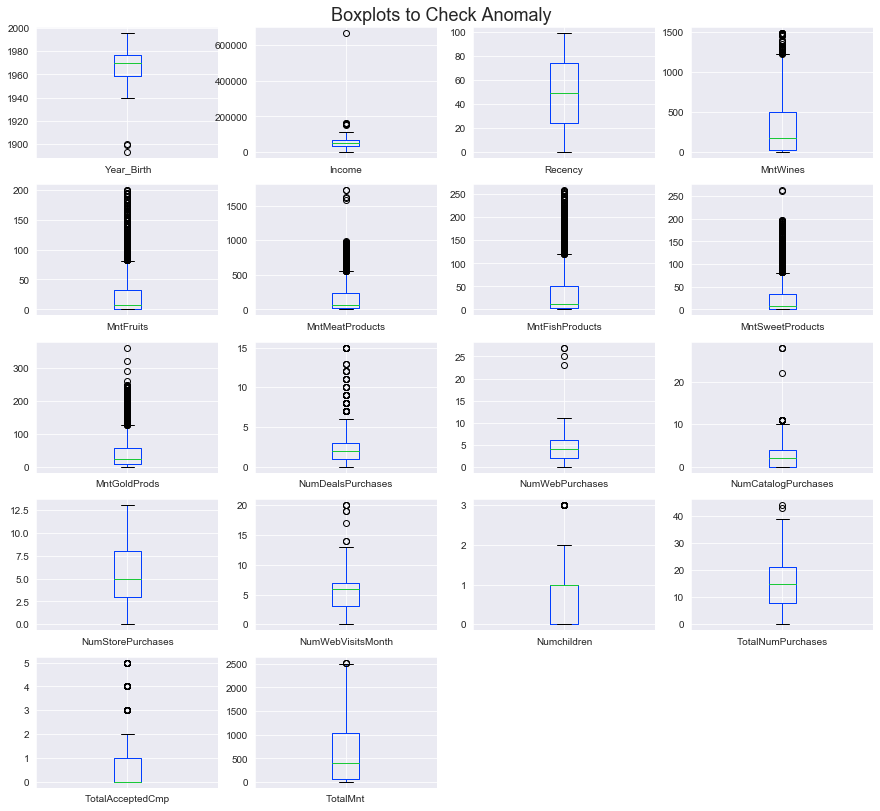

In [22]:
df_boxplot.plot(subplots=True, kind='box', layout=(5, 4), figsize=(15,14))
plt.suptitle('Boxplots to Check Anomaly', fontsize=18, y=0.9)

In [23]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

### Finding and Thought:
> **Most of the columns contain outliers. Considering this is a sample data set comes from the population, most of the outliers are reasonable expect 'Year_Birth'. Customers who were born before 1900 have extremely small chance still being alive.**

> **2 scenarios may cause the anomaly in 'Year_Bitrh' column: a. Data entry errors. b. The cutomer account can be inherited or the attorney of customer is operating the account.**

> **I will choose to remove the outliers in 'Year_Birth'.**

In [24]:
df[df.Year_Birth < df.Year_Birth.mean() - 3*df.Year_Birth.std()].index

Int64Index([192, 239, 339], dtype='int64')

In [25]:
df.drop(df.index[[192, 239, 339]], inplace=True)

In [26]:
df.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

> **Add the column of customers' age.**

In [27]:
# Considering the creator of this data set didn't aware of when was the data collected. I use 2019 as current year.
df['Age'] = 2018 - df.Year_Birth

> **Replace missing value in 'Income' column with the median of each education level**

In [28]:
df.groupby('Education')['Income'].median()

Education
1st_Cycle    20744.0
2nd_Cycle    51111.0
3rd_Cycle    55185.0
Name: Income, dtype: float64

In [29]:
def filling_miss_income(x):
    Education = x[0]
    Income = x[1]
    
    if pd.isnull(Income):
        if Education == '1st_Cycle':
            return 20744.0
        elif Education == '2nd_Cycle':
            return 51111.0
        else:
            return 55185.0
    else:
        return Income

In [30]:
df['Income'] = df[['Education', 'Income']].apply(filling_miss_income, axis=1)

> **Change the data type of 'Dt_Cutomer' to datetime**

In [31]:
df.Dt_Customer.dtype

dtype('O')

In [32]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 32 columns):
ID                     2237 non-null int64
Year_Birth             2237 non-null int64
Education              2237 non-null object
Marital_Status         2237 non-null object
Income                 2237 non-null float64
Kidhome                2237 non-null int64
Teenhome               2237 non-null int64
Dt_Customer            2237 non-null datetime64[ns]
Recency                2237 non-null int64
MntWines               2237 non-null int64
MntFruits              2237 non-null int64
MntMeatProducts        2237 non-null int64
MntFishProducts        2237 non-null int64
MntSweetProducts       2237 non-null int64
MntGoldProds           2237 non-null int64
NumDealsPurchases      2237 non-null int64
NumWebPurchases        2237 non-null int64
NumCatalogPurchases    2237 non-null int64
NumStorePurchases      2237 non-null int64
NumWebVisitsMonth      2237 non-null int64
AcceptedCmp3        

In [34]:
df.rename(columns={'Response':'AcceptedCmp6'}, inplace=True)

In [35]:
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

> **Store the cleaned data set**

In [36]:
df.reset_index(drop=True)
df.to_csv('Cleaned_Marketing_Campaign.csv', index=False)

> **Visualization**

In [37]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'AcceptedCmp6', 'Numchildren', 'TotalNumPurchases',
       'TotalAcceptedCmp', 'TotalMnt', 'Age'],
      dtype='object')

Text(0, 0.5, 'Count')

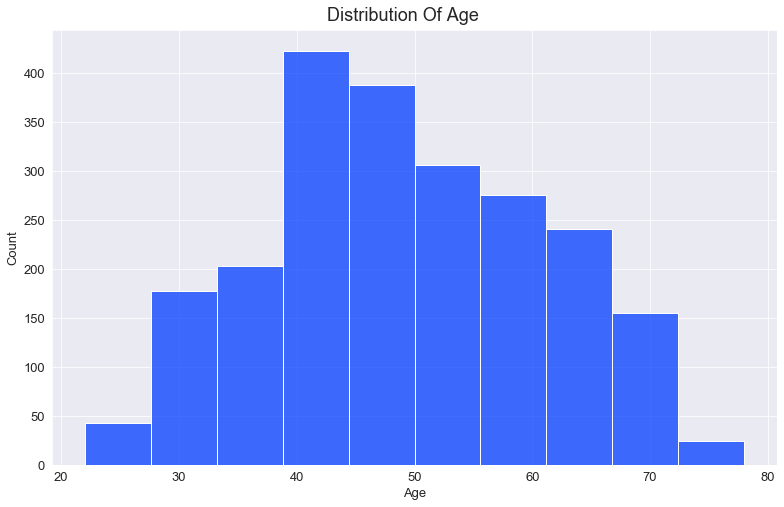

In [38]:
rcParams['figure.figsize'] = 13, 8
sns.histplot(data=df, x='Age', bins=10)

plt.suptitle('Distribution Of Age', fontsize=18, x=0.5, y=0.92)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Count', fontsize=13)

Text(28.877441406250007, 0.5, 'Total')

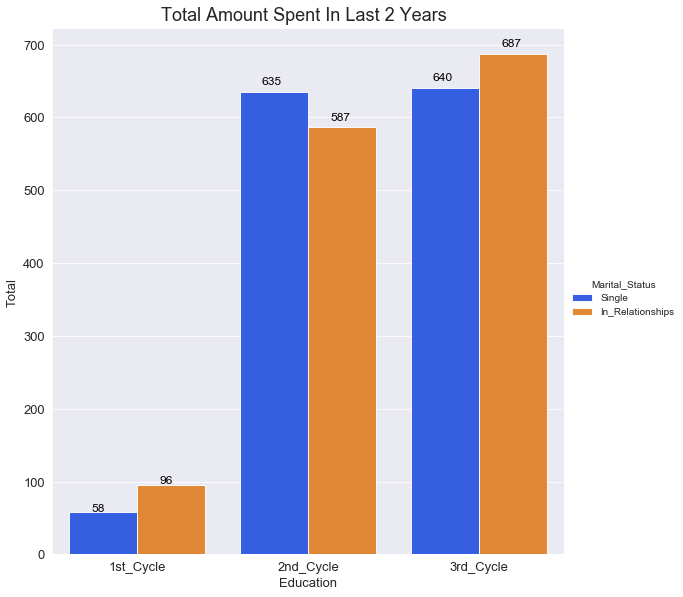

In [39]:
plot_order = ['1st_Cycle', '2nd_Cycle', '3rd_Cycle']
plot_1 = sns.catplot(data=df, x='Education', y='TotalMnt', hue='Marital_Status', kind='bar', 
            order=plot_order, ci=None, alpha=0.9, height=8)

ax = plot_1.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.13, 
            p.get_height() * 1.015,
            '{0:.0f}'.format(p.get_height()),
            color='black', 
            rotation='horizontal', 
            size='large')
    
plt.suptitle('Total Amount Spent In Last 2 Years', fontsize=18, x=0.45, y=1.02)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel('Education', fontsize=13)
plt.ylabel('Total', fontsize=13)

### Insights
> **People who are 40s to 50s with postgraduate education background are the major customers**

> **Our company can utilize the the advantage of major customers' age and education background to attract more potential customers. For example, we can build an activity/promotion with reward that encourage our existing active customers to refer their friends/colleagues to become our new customer.**

> **Metrics that can be used to measure the referral activity: Number of new register customer,  Number of visits to company’s web site.**

In [40]:
df.Recency.describe()  

count    2237.000000
mean       49.104604
std        28.956073
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [41]:
r_labels = range(4, 0, -1)
r_groups = pd.qcut(df['Recency'], q=4, labels=r_labels)

In [42]:
df = df.assign(R = r_groups.values)

In [43]:
df[['ID','Recency', 'R']]

,ID,Recency,R
0,5524,58,2
1,2174,38,3
2,4141,26,3
3,6182,26,3
4,5324,94,1
...,...,...,...
2235,10870,46,3
2236,4001,56,2
2237,7270,91,1
2238,8235,8,4
